In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#Original Draft Data

master_data = pd.read_csv("../starting file/Draft_SD_CSV.csv")

C:\Users\daily\Anaconda3\envs\PythonData\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
#Creating WAR Group Column

master_data.loc[(master_data["Total_WAR"] < 5), "WAR Group"] = "Less than 5 WAR"
master_data.loc[(master_data["Total_WAR"] < 10) & (master_data["Total_WAR"] >= 5), "WAR Group"] = "5-10 WAR"
master_data.loc[(master_data["Total_WAR"] < 15) & (master_data["Total_WAR"] >= 10), "WAR Group"] = "10-15 WAR"
master_data.loc[(master_data["Total_WAR"] < 20) & (master_data["Total_WAR"] >= 15), "WAR Group"] = "15-20 WAR"
master_data.loc[(master_data["Total_WAR"] < 25) & (master_data["Total_WAR"] >= 20), "WAR Group"] = "20-25 WAR"
master_data.loc[(master_data["Total_WAR"] >= 25), "WAR Group"] = "More than 25 WAR"
master_data["WAR Group"].fillna("No Major League Experience", inplace = True)

In [4]:
#Limiting the data to only Reds players

reds_data = master_data.loc[master_data["Franchise"] == "Reds"]

#Only showing players that signed with the Reds

signed_reds_data = reds_data.loc[reds_data["Signed"] == "Y"]

#Grouped by draft class

draft_class_year = signed_reds_data.groupby("Year")

#Unsigned Reds draft picks

unsigned_reds_data = reds_data.loc[reds_data["Signed"] == "N"]

In [5]:
#Total WAR by draft class sorted by best to worst

draft_class_year["Total_WAR"].sum().sort_values(ascending = False)

Year
1965    56.9
1980    50.4
1998    49.2
1983    38.3
1969    37.1
2007    35.9
2002    35.6
1987    30.0
2005    29.3
2009    27.8
1985    27.5
2010    26.3
1978    26.2
2006    24.4
1995    22.4
1966    18.8
1974    18.8
1976    18.5
1986    16.0
1975    15.9
1970    13.4
1989    13.3
1982    13.2
1994    12.8
1981    12.2
2004    12.2
1990    10.4
1977    10.3
2013     7.9
1979     7.4
1991     5.5
1967     4.5
2011     4.3
1997     4.0
2003     3.8
1993     3.5
1971     3.3
2008     3.0
1988     2.9
1999     2.4
1984     1.4
2012     1.3
1992     1.2
1968     1.0
2016     0.8
2000     0.6
2014     0.3
2018     0.0
1973     0.0
1972     0.0
2001     0.0
2017     0.0
2019     0.0
1996    -0.1
2015    -0.5
Name: Total_WAR, dtype: float64

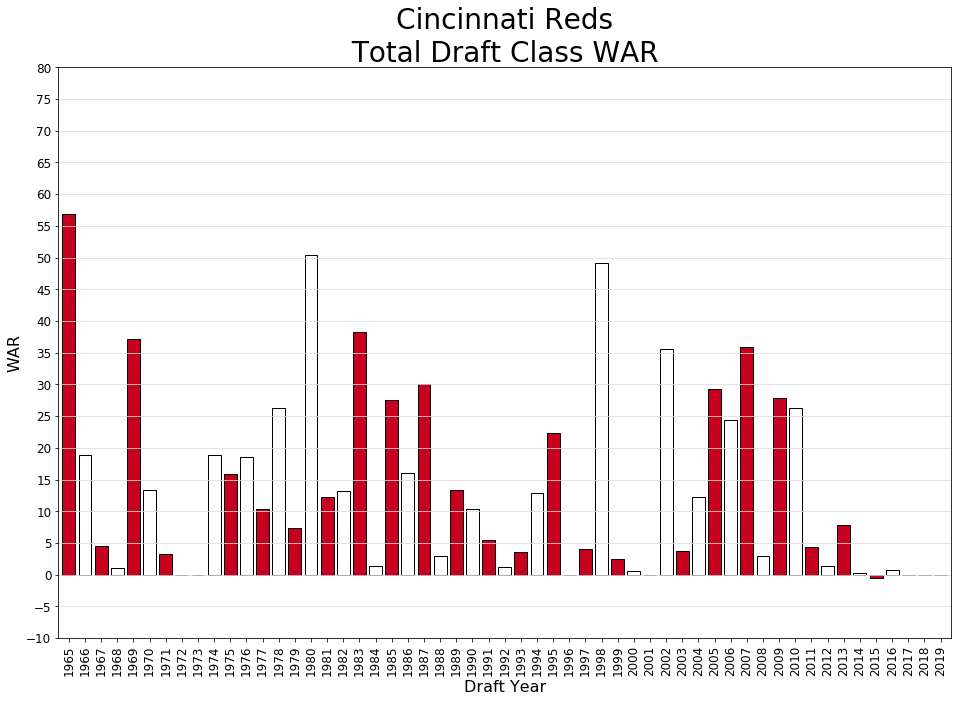

In [13]:
#WAR by draft class year bargraph

draft_class_year["Total_WAR"].sum().plot(kind = "bar", color = ["#C6011F", "white"], width = .8, fontsize = 12, edgecolor = "#000000", figsize = (16, 10.5))
plt.title("Cincinnati Reds\n Total Draft Class WAR ", size = 28)
plt.xlabel("Draft Year", size = 16)
plt.ylabel("WAR", size = 16)
plt.yticks(np.arange(-10, 81, step = 5))
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("Reds WAR Total by Draft Year.png")
plt.show()

In [7]:
#Best draft picks in franchise history

signed_reds_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
35,1965,2,36,Reds,Reds,Y,Johnny Bench,1967.0,benchjo01,1000826.0,35.6,0.0,35.6,C,HS,Binger HS,Binger,OK,More than 25 WAR
41277,2002,2,44,Reds,Reds,Y,Joey Votto,2007.0,vottojo01,4314.0,32.3,0.0,32.3,C,HS,Richview Collegiate Institute,Toronto,ON,More than 25 WAR
16538,1985,1,4,Reds,Reds,Y,Barry Larkin,1986.0,larkiba01,335.0,28.3,0.0,28.3,SS,4Yr,University of Michigan,Ann Arbor,MI,More than 25 WAR
53186,2010,1,12,Reds,Reds,Y,Yasmani Grandal,2012.0,grandya01,11368.0,27.4,0.0,27.4,C,4Yr,University of Miami,Coral Gables,FL,More than 25 WAR
12552,1980,8,200,Reds,Reds,Y,Eric Davis,1984.0,daviser01,1003048.0,24.5,0.0,24.5,SS,HS,Fremont HS,Los Angeles,CA,20-25 WAR
48730,2007,1,34,Reds,Reds,Y,Todd Frazier,2011.0,frazito01,785.0,20.9,0.0,20.9,3B,4Yr,Rutgers the State University of New Jersey,New Brunswick,NJ,20-25 WAR
35427,1998,2,50,Reds,Reds,Y,Adam Dunn,2001.0,dunnad01,319.0,20.9,0.0,20.9,OF,HS,New Caney HS,New Caney,TX,20-25 WAR
836,1966,1,13,Reds,Reds,Y,Gary Nolan,1967.0,nolanga01,1009616.0,0.4,20.2,20.6,RHP,HS,Oroville HS,Oroville,CA,20-25 WAR
18437,1987,7,180,Reds,Reds,Y,Reggie Sanders,1991.0,sandere02,1129.0,19.1,0.0,19.1,SS,JC,Spartanburg Methodist College,Spartanburg,SC,15-20 WAR
4221,1969,29,682,Reds,Reds,Y,Ken Griffey,1973.0,griffke01,1005044.0,17.5,0.0,17.5,OF,HS,Donora HS,Donora,PA,15-20 WAR


In [8]:
#Biggest draft busts found by looking at first rounders who had less than 5 WAR or didn't make majors

signed_reds_data.loc[((signed_reds_data["WAR Group"] == "Less than 5 WAR") |
(signed_reds_data["WAR Group"] == "No Major League Experience")) & 
(signed_reds_data["Rnd"] == 1)]

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
1662,1967,1,8,Reds,Reds,Y,Wayne Simpson,1970.0,simpswa01,1011999.0,-1.1,2.6,1.5,RHP,HS,Centennial HS,Compton,CA,Less than 5 WAR
2642,1968,1,13,Reds,Reds,Y,Timothy Grant,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Riverview HS,Boykins,VA,No Major League Experience
4598,1970,1,15,Reds,Reds,Y,Gary Polczynski,NaN,NaN,NaN,NaN,NaN,NaN,SS,HS,Nathan Hale HS,West Allis,WI,No Major League Experience
6318,1972,1,7,Reds,Reds,Y,Larry Payne,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Huntsville HS,Huntsville,TX,No Major League Experience
7124,1973,1,22,Reds,Reds,Y,Bradford Kessler,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Claremont HS,Claremont,CA,No Major League Experience
7872,1974,1,23,Reds,Reds,Y,Steve Reed,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Fort Wayne HS,Fort Wayne,IN,No Major League Experience
8558,1975,1,22,Reds,Reds,Y,Tony Moretto,NaN,NaN,NaN,NaN,NaN,NaN,OF,HS,Harrison HS,Evansville,IN,No Major League Experience
9238,1976,1,23,Reds,Reds,Y,Mark King,NaN,NaN,NaN,NaN,NaN,NaN,RHP,HS,Owensboro Senior HS,Owensboro,KY,No Major League Experience
9952,1977,1,24,Reds,Reds,Y,Tad Venger,NaN,NaN,NaN,NaN,NaN,NaN,3B,HS,William S. Hart HS,Santa Clarita,CA,No Major League Experience
11502,1979,1,20,Reds,Reds,Y,Danny Lamar,NaN,NaN,NaN,NaN,NaN,NaN,C,HS,Bellaire HS,Bellaire,TX,No Major League Experience


In [9]:
#Best unsigned draft picks in franchise history

unsigned_reds_data.sort_values(["Total_WAR"],ascending = False).head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
14088,1982,2,51,Reds,Reds,N,Barry Larkin,1986.0,larkiba01,335.0,28.3,0.0,28.3,SS,HS,Archbishop Moeller HS,Cincinnati,OH,More than 25 WAR
41908,2002,23,675,Reds,Reds,N,Nick Markakis,2006.0,markani01,5930.0,20.2,0.0,20.2,OF,JC,Young Harris College,Young Harris,GA,20-25 WAR
40804,2001,35,1056,Reds,Reds,N,Nick Markakis,2006.0,markani01,5930.0,20.2,0.0,20.2,LHP,HS,Woodstock HS,Woodstock,GA,20-25 WAR
45113,2004,31,918,Reds,Reds,N,Jake Arrieta,2010.0,arrieja01,4153.0,1.4,18.3,19.7,RHP,HS,Plano East HS,Plano,TX,15-20 WAR
14218,1982,7,181,Reds,Reds,N,Bobby Witt,1986.0,wittbo01,1014170.0,0.0,14.7,14.7,RHP,HS,Canton HS,Canton,MA,10-15 WAR
2242,1967,31,588,Reds,Reds,N,Chris Chambliss,1971.0,chambch01,1002119.0,13.7,0.0,13.7,1B,JC,MiraCosta College,Oceanside,CA,10-15 WAR
58412,2013,31,945,Reds,Reds,N,Andrew Benintendi,2016.0,beninan01,17901.0,9.0,0.0,9.0,CF,HS,Madeira HS,Cincinnati,OH,5-10 WAR
6842,1972,23,531,Reds,Reds,N,Ron Hassey,1978.0,hassero01,1005479.0,8.7,0.0,8.7,SS,HS,Tucson HS,Tucson,AZ,5-10 WAR
56641,2012,13,412,Reds,Reds,N,Matthew Boyd,2015.0,boydma01,15440.0,0.1,8.0,8.1,LHP,4Yr,Oregon State University,Corvallis,OR,5-10 WAR
6060,1971,23,552,Reds,Reds,N,Dave Collins,1975.0,collida02,1002449.0,7.8,0.0,7.8,1B,HS,Stevens HS,Rapid City,SD,5-10 WAR


In [10]:
#Best Draft Picks outside the top 10 rounds

hidden_gems = signed_reds_data.loc[signed_reds_data["Rnd"] > 10].sort_values("Total_WAR", ascending = False)

hidden_gems.head(10)

,Year,Rnd,OvPck,Tm,Franchise,Signed,Name,Debut_Year,playerID,fg_id,Hitting_WAR,Pitching_WAR,Total_WAR,Pos,Type,School,City,State,WAR Group
4221,1969,29,682,Reds,Reds,Y,Ken Griffey,1973.0,griffke01,1005044.0,17.5,0.0,17.5,OF,HS,Donora HS,Donora,PA,15-20 WAR
21243,1989,11,290,Reds,Reds,Y,Trevor Hoffman,1993.0,hoffmtr01,1035.0,-0.1,12.7,12.6,SS,4Yr,University of Arizona,Tucson,AZ,10-15 WAR
9718,1976,21,503,Reds,Reds,Y,Eddie Milner,1980.0,milneed01,1008964.0,11.1,0.0,11.1,OF,4Yr,Central State University,Wilberforce,OH,10-15 WAR
11085,1978,15,381,Reds,Reds,Y,Gary Redus,1982.0,redusga01,1010758.0,10.7,0.0,10.7,SS,NaN,NaN,NaN,NaN,10-15 WAR
35877,1998,17,500,Reds,Reds,Y,B.J. Ryan,1999.0,ryanb.01,168.0,0.0,8.2,8.2,LHP,4Yr,University of Louisiana at Lafayette,Lafayette,LA,5-10 WAR
9883,1976,31,668,Reds,Reds,Y,Jay Howell,1980.0,howelja01,1006098.0,0.0,7.6,7.6,RHP,4Yr,University of Colorado,Boulder,CO,5-10 WAR
5039,1970,19,454,Reds,Reds,Y,Pat Zachry,1976.0,zachrpa01,1014407.0,-1.6,8.8,7.2,RHP,HS,Richfield HS,Waco,TX,5-10 WAR
18645,1987,15,388,Reds,Reds,Y,Butch Henry,1992.0,henrybu01,1005667.0,-0.2,7.0,6.8,LHP,HS,El Paso HS,El Paso,TX,5-10 WAR
47698,2006,17,504,Reds,Reds,Y,Chris Heisey,2010.0,heisech01,3978.0,5.1,0.0,5.1,OF,4Yr,Messiah College,Grantham,PA,5-10 WAR
17646,1986,11,280,Reds,Reds,Y,Keith Lockhart,1994.0,lockhke01,1380.0,4.4,0.0,4.4,2B,4Yr,Oral Roberts University,Tulsa,OK,Less than 5 WAR


In [11]:
#Creating table for percentage of picks by school type

draft_year_school_table_pct = pd.crosstab(reds_data["Year"], reds_data["Type"], normalize = "index")

100 * round(draft_year_school_table_pct,3)

Type,4Yr,HS,JC
Year,,,
1965,21.9,65.6,12.5
1966,37.0,63.0,0.0
1967,13.9,76.4,9.7
1968,9.1,90.9,0.0
1969,13.9,77.8,8.3
1970,25.5,70.2,4.3
1971,19.4,80.6,0.0
1972,25.8,71.0,3.2
1973,14.7,73.5,11.8


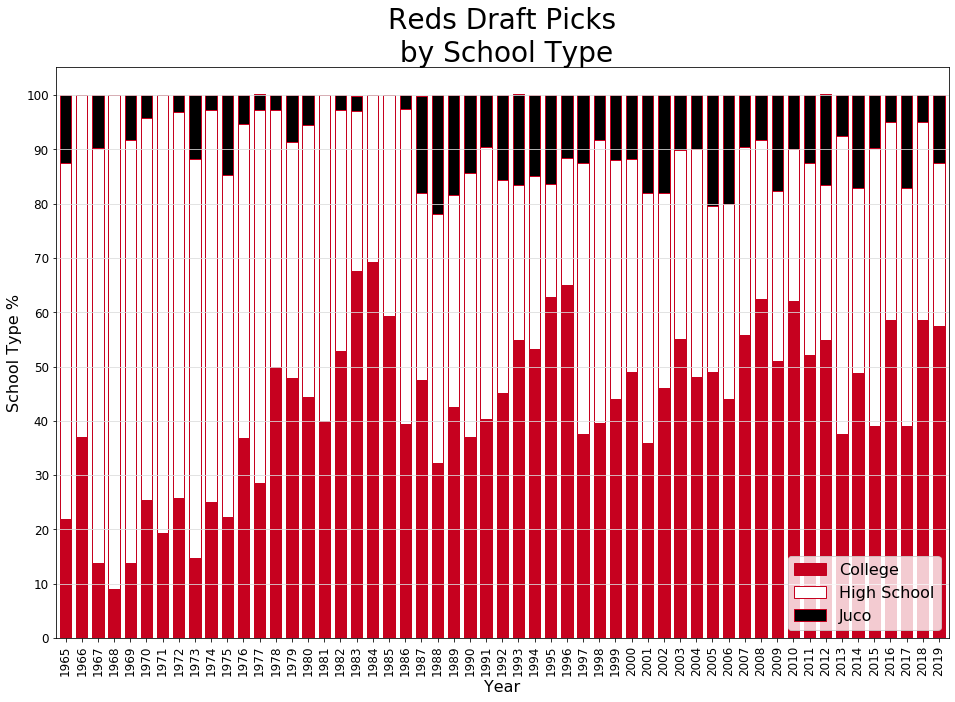

In [14]:
#Bar chart of table above

colors = ["#C6011F", "white", "#000000"]

(100 * round(draft_year_school_table_pct,3)).plot(kind = "bar", color = colors, width = .7, fontsize = 12, 
edgecolor = "#C6011F", stacked = True, figsize = (16, 10.5))
plt.title("Reds Draft Picks\n by School Type", size = 28)
plt.xlabel("Year", size = 16)
plt.ylabel("School Type %", size = 16)
plt.yticks(np.arange(0, 101, step = 10))
plt.legend(["College", "High School", "Juco"], loc = "lower right", fontsize = 16)
plt.grid(color = "gainsboro", linestyle = "-", axis = "y")
plt.savefig("Reds Draft Picks by School Type.png")
plt.show()